In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib,sys,os,json,h5py
# from cupy.fft import rfft2,irfft2
from matplotlib.colors import TwoSlopeNorm,ListedColormap
import matplotlib as mpl
mpl.rc("text", usetex = True)

In [2]:
paramfile = '/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/parameters.json'
with open(paramfile,'r') as jsonFile: params = json.load(jsonFile)

d = params["d"] # Dimension
nu =params["nu"] # Viscosity
Re = 1/nu if nu > 0 else np.inf # Reynolds number
N = Nx = Ny = params["N"] # Grid size
dt = params["dt"] # Timestep
T = params["T"] # Final time
alph = params["alph"] # Density of the particles
eta = params["eta"]/(Nx//3) # Desired Kolmogorov length scale
Nprtcl = params["Nprtcl"] # Number of particles
tf = params["tf"] # Kolmogorov timescale
st = params["st"]*tf # Particle Stokes number
linnu = params["linnu"] # Linear viscosity
order = params["order"] # Order of the scheme
iname = "spline" if order == 4 else "linear"

In [3]:
st

0.8999999999999999

In [4]:
savePlot = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/Plots/iname/Re_{np.round(Re,2)},dt_{dt},N_{N}/")
savePlot.mkdir(parents=True, exist_ok=True)
loadPath = pathlib.Path(f"data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{Nx}/")
prtcl_loadPath = loadPath/f"alpha_{alph:.2}_prtcl/St_{st}/"
loadPath.exists()

True

In [5]:
alpha_values = [0.7,0.72,0.8,0.95,1.00]
alpha_values = np.array(alpha_values)

In [6]:
def region(alph,Q):
    return np.where((alph**4 + 144* (alph - 1)**2*Q**2 + 8*(3*alph - 1)*alph**2*Q<0),1,0)

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
0.00044054752470027374
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
0.0009656271603793311
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
0.0038679922142288454
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
0.007280591494350425
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
0.007621454139539068


/tmp/ipykernel_17604/3325688724.py:11: RuntimeWarning: invalid value encountered in true_divide
  ax[0].plot(times,f['Caustics_ratio'][:]/times,label=f'${alph}$')
/tmp/ipykernel_17604/3325688724.py:12: RuntimeWarning: invalid value encountered in true_divide
  print(np.sum((f['Caustics_ratio'][:]/times)[-10:]))


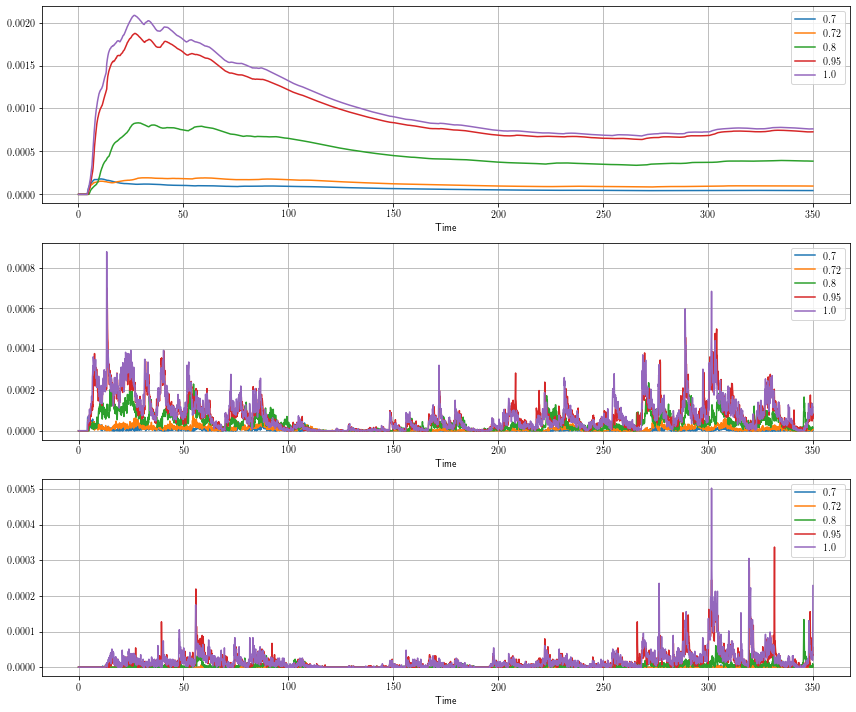

In [7]:
fig,ax = plt.subplots(3,1,figsize=(12,10))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]#*(3*alph - 2)**2
        ax[0].plot(times,f['Caustics_ratio'][:]/times,label=f'${alph}$')
        print(np.sum((f['Caustics_ratio'][:]/times)[-10:]))
        ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.tick_params(axis='y', labelsize=20)
    
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].legend()
    ax[i].grid()
    # ax.set_ylim(-0.015,0.005)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
        ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        ax.tick_params(axis='y', labelsize=20)
    
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(1):
    ax.set_xlabel('Time')
    ax.legend()
    ax.grid()
    ax.set_ylim(-0.015,0.005)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
        ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
    
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(1):
    ax.set_xlabel('Time')
    ax.legend()
    ax.grid()
    ax.set_ylim(-0.015,0.005)
    ax.tick_params(axis='y', labelsize=20)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.7
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))

        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
# ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
p1 = ax[0].contourf(times,Qvals,Q_field_pdf.T,levels=200,cmap = "Reds")
p2 = ax[1].contourf(times,Qvals,Q_particle_pdf.T,levels=200,cmap = "Reds")
ax[1].plot(times,Q_particle_mean,'-',color = 'black',linewidth = 2)
p3 = ax[2].contourf(times,Qvals,Q_caus_pdf.T,levels=200,cmap = "Reds")
fig.colorbar(p1, ax=ax[0], location='right')
fig.colorbar(p2, ax=ax[1], location='right')
fig.colorbar(p3, ax=ax[2], location='right')

# fig.colorbar(p3)
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].set_ylim(-0.0125,0.0125)
ax[0].set_ylabel('<Q>')
    # ax.legend()
    # ax.grid()
    # ax.set_xlim(0,30)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.95
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))

        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
# ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
p1 = ax[0].contourf(times,Qvals,Q_field_pdf.T,levels=200,cmap = "Blues")
p2 = ax[1].contourf(times,Qvals,Q_particle_pdf.T,levels=200,cmap = "Blues")
ax[1].plot(times,Q_particle_mean,'-',color = 'black',linewidth = 2)
p3 = ax[2].contourf(times,Qvals,Q_caus_pdf.T,levels=200,cmap = "Blues")
fig.colorbar(p1, ax=ax[0], location='right')
fig.colorbar(p2, ax=ax[1], location='right')
fig.colorbar(p3, ax=ax[2], location='right')

# fig.colorbar(p3)
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].set_ylim(-0.0125,0.0125)
ax[0].set_ylabel('<Q>')
    # ax.legend()
    # ax.grid()
    # ax.set_xlim(0,30)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

fig.savefig(savePlot / 'caustics.png',dpi=300)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.95
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    time = 150
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_field_pdf = Q_field_pdf / np.sum(Q_field_pdf,axis = 1)[:,None]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_pdf = Q_particle_pdf / np.sum(Q_particle_pdf,axis = 1)[:,None]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]
    Qppdf = Q_particle_pdf[times == time]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
Qpmean = np.sum(Qvals[None,:]*Qppdf[0])
t = 20
Q_heavy = Q_particle_pdf[t]
ax.plot(Qvals,Q_field_pdf[t],label = 'Field PDF')
ax.plot(Qvals,Q_particle_pdf[t],label = 'Particle PDF')
# ax.plot(Qvals,Q_caus_pdf[t],label = 'Caus PDF')
# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
ax.legend()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.70
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    time = 150
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_field_pdf = Q_field_pdf / np.sum(Q_field_pdf,axis = 1)[:,None]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_pdf = Q_particle_pdf / np.sum(Q_particle_pdf,axis = 1)[:,None]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]
    Qppdf = Q_particle_pdf[times == time]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
Qpmean = np.sum(Qvals[None,:]*Qppdf[0])
t = 20
Q_light = Q_particle_pdf[t]
ax.plot(Qvals,Q_field_pdf[t],label = 'Field PDF')
ax.plot(Qvals,Q_particle_pdf[t],label = 'Light Particle PDF')
ax.plot(Qvals,Q_heavy,label = 'Heavy Particle PDF')

# ax.plot(Qvals,Q_caus_pdf[t],label = 'Caus PDF')
# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
ax.legend()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.7
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_caus_shifted = f['Q_caus_shifted'][:]

Q_caus_shifted_pdf = np.zeros((len(times),len(Qvals)))
for i,time in enumerate(times[:-1]):
    Q_caus_shifted_pdf[i] = np.histogram(Q_caus_shifted[i],bins = Qbins)[0]
Q_caus_shifted_pdf = Q_caus_shifted_pdf/np.sum(Q_caus_shifted_pdf,axis = 1)[:,None]
Q_caus_shifted_mean = np.sum(Qvals[None,:]*Q_caus_shifted_pdf,axis = 1)
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
p2 = ax.contourf(times - times[-1],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=200,cmap = "Reds")
ax.set_xlim(-50,0)
ax.grid()
fig.colorbar(p2, ax=ax, location='right')
ax.plot(times - times[-1],Q_caus_shifted_mean,'-',color = 'black',linewidth = 2)
ax.set_xlabel('$t-t_c$')
ax.set_ylabel('Q')

# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
Q_caus_shifted

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 1.00
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_caus_shifted = f['Q_caus_shifted'][:]

Q_caus_shifted_pdf = np.zeros((len(times),len(Qvals)))
for i,time in enumerate(times[:-1]):
    Q_caus_shifted_pdf[i] = np.histogram(Q_caus_shifted[i],bins = Qbins)[0]
Q_caus_shifted_pdf = Q_caus_shifted_pdf/np.sum(Q_caus_shifted_pdf,axis = 1)[:,None]
Q_caus_shifted_mean = np.sum(Qvals[None,:]*Q_caus_shifted_pdf,axis = 1)
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
p2 = ax.contourf(times - times[-1],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=200,cmap = "Blues")
ax.grid()
ax.set_xlim(-50,0)
fig.colorbar(p2, ax=ax, location='right')
ax.plot(times - times[-1],Q_caus_shifted_mean,'-',color = 'black',linewidth = 2)
ax.set_xlabel('$t-t_c$')
ax.set_ylabel('Q')
# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125Q_caus_shifted

In [8]:
from time import time as tt

Loading alpha = 0.72 at 1730713569.540352
Plotting alpha = 0.72 at 1730713573.4505925


/tmp/ipykernel_17604/785874191.py:31: RuntimeWarning: divide by zero encountered in log10
  p2 = ax[iiii//2,iiii%2].contourf(times[:-1] - times[-2],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=50,cmap = "Reds",norm = norm)


KeyboardInterrupt: 

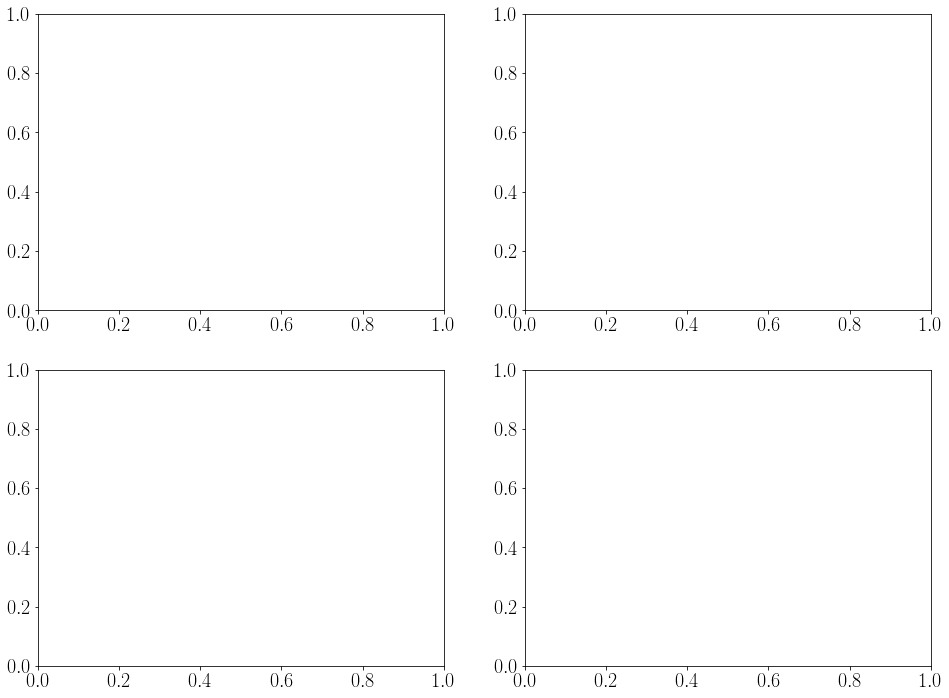

In [9]:
labels = ["(a)","(b)","(c)","(d)"]
bgcmap = ListedColormap([(0,0,0,0),(.96, .72, .97,0.6)])
plt.rcParams.update({'xtick.labelsize': 20, 'ytick.labelsize': 20, 'legend.fontsize': 25, 'axes.labelsize': 30, 'axes.titlesize': 30})
fig,ax = plt.subplots(2,2,figsize=(16,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])
alph_values = [0.72,0.8,1.0]
Q_caus_shifted_pdf = np.zeros((len(times)-1,len(Qvals)))
cls = ["#219ebc", "#ffb703","#3a5a40"]
norm = TwoSlopeNorm(vmin=-3, vmax=0.0,vcenter = -1.5)
times = st*times
for iiii,alph in enumerate(alph_values):
    print(f"Loading alpha = {alph} at {tt()}")
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        # print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        Q_caus_shifted = f['Q_caus_shifted'][:]

    for i,time in enumerate(times[:-1]):
        Q_caus_shifted_pdf[i] = np.histogram(Q_caus_shifted[i],bins = Qbins)[0]
    Q_caus_shifted_pdf = Q_caus_shifted_pdf/np.sum(Q_caus_shifted_pdf,axis = 1)[:,None]
    Q_caus_shifted_mean = np.sum(Qvals[None,:]*Q_caus_shifted_pdf,axis = 1)
        # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
    
    Qreg = region(alph,np.ones_like(Q_caus_shifted_pdf)*Qvals[None,:])
    print(f"Plotting alpha = {alph} at {tt()}")
    p2 = ax[iiii//2,iiii%2].contourf(times[:-1] - times[-2],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=50,cmap = "Reds",norm = norm)
    ax[iiii//2,iiii%2].contourf(times[:-1] - times[-2],Qvals, Qreg.T,levels = 1,cmap = bgcmap)
    ax[iiii//2,iiii%2].set_xlim(-20,0)
    ax[iiii//2,iiii%2].grid()
    ax[iiii//2,iiii%2].set_title(fr'{labels[iiii]} $\alpha = {alph}$')
    ax[iiii//2,iiii%2].plot(times[:-1] - times[-2],Q_caus_shifted_mean,'-',color = 'black',linewidth = 2)
    ax[1,1].plot(times[:-1] - times[-2],Q_caus_shifted_mean,'-',color = cls[iiii],linewidth = 2,label = fr'$\alpha = {alph}$')
    if iiii%2 == 0:
        ax[iiii//2,iiii%2].set_ylabel(r'$Q$',rotation = 0)
    if iiii//2 == 1:
        ax[iiii//2,iiii%2].set_xlabel('$t-t_c$')
    print(f"Done  alpha = {alph} at {tt()}")
ax[1,1].legend()
ax[1,1].set_title('(d) $\\langle Q \\rangle$')
ax[1,1].set_xlabel('$t-t_c$')
ax[1,1].set_xlim(-20,0)
ax[1,1].grid()
fig.colorbar(p2, ax=ax, location='right', shrink=0.5)
# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
# Q_caus_shifted

# Qpdfs
## Time averaged pdf of Qfield. 
## Time averaged pdf of the particles for 2 different density ratio. 
## Pdf of where causitcs formed.
## Pdf where the caustics was triggered. 

For $\alpha = 0.7, 1.0$

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


/tmp/ipykernel_29738/1496420734.py:30: RuntimeWarning: invalid value encountered in true_divide
  Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]


Field_mean : -2.0481382446719404e-06, Particle_mean : -0.004416175066275869
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
Field_mean : -2.0481382446719404e-06, Particle_mean : -0.009337194398148662


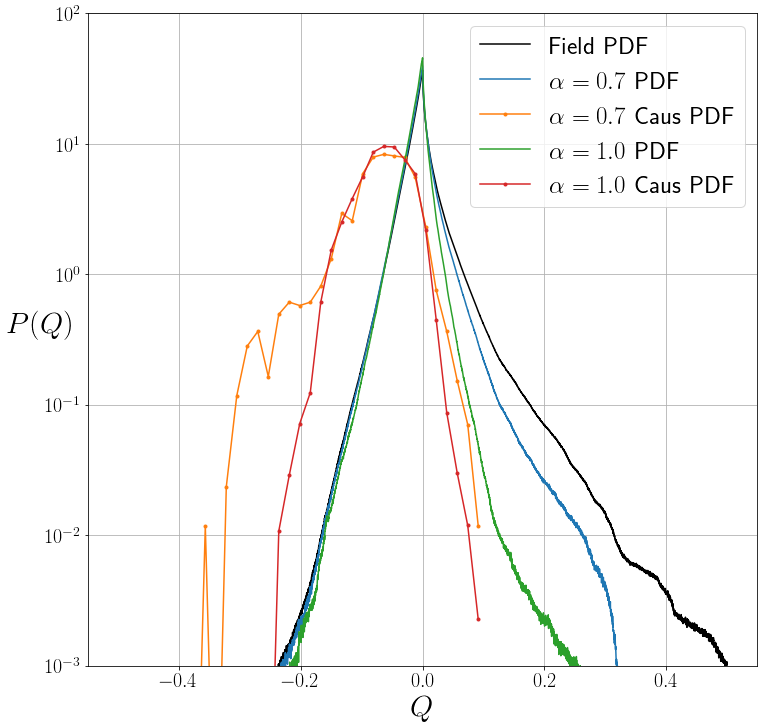

In [16]:
plt.rcParams.update({'xtick.labelsize': 20, 'ytick.labelsize': 20, 'legend.fontsize': 25, 'axes.labelsize': 30})
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qmax = 0.5
Qmin = -0.5
Qbins = np.linspace(Qmin,Qmax, 6001)
Qbins_width = Qbins[1]-Qbins[0]
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])


Q1bins = np.linspace(-0.4,0.1, 30)
Q1bin_width = Q1bins[1]-Q1bins[0]
Q1vals = 0.5*(Q1bins[1:]+Q1bins[:-1])
alpha_values = [0.7,1.0]
# t_avg_Qpdf_field = [] 
for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data_{iname}/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        time = 150
        Q_field_pdf = f['Q_field_pdf'][:]
        Q_field_pdf = Q_field_pdf / np.sum(Q_field_pdf,axis = 1)[:,None]
        Q_particle_pdf = f['Q_particle_pdf'][:]
        Q_particle_pdf = Q_particle_pdf / np.sum(Q_particle_pdf,axis = 1)[:,None]
        Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
        Q_caus_pdf = f['Q_caus_pdf'][:]
        Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]
        Qppdf = Q_particle_pdf[times == time]
        Q_caus_shifted = f['Q_caus_shifted'][:]
        # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
    # print(np.max(Q_caus_shifted[-1]),np.min(Q_caus_shifted[-1]))
    Qpmean = np.sum(Qvals[None,:]*Qppdf[0])
    time_averaged_Qpdf_field = np.sum(Q_field_pdf,axis = 0)/len(times)
    time_averaged_Qpdf_particle = np.sum(Q_particle_pdf,axis = 0)/len(times)
    field_mean = np.sum(Qvals*time_averaged_Qpdf_field)
    particle_mean = np.sum(Qvals*time_averaged_Qpdf_particle)
    print(f"Field_mean : {field_mean}, Particle_mean : {particle_mean}")
    Q_caus_shifted_pdf = np.zeros((len(times)-1,len(Q1vals)))
    for i,time in enumerate(times[:-1]):
        # print(np.histogram(Q_caus_shifted[i],bins = Q1bins)[0].shape)
        Q_caus_shifted_pdf[i] = np.histogram(Q_caus_shifted[i],bins = Q1bins)[0]
    Q_caus_shifted_pdf = Q_caus_shifted_pdf/np.sum(Q_caus_shifted_pdf,axis = 1)[:,None]
    Q_caus_shifted_mean = np.sum(Q1vals[None,:]*Q_caus_shifted_pdf,axis = 1)



    
    if alph == 0.7: ax.plot(Qvals,time_averaged_Qpdf_field/Qbins_width,label = 'Field PDF',color = "black")
    
    ax.plot(Qvals,time_averaged_Qpdf_particle/Qbins_width,label = fr'$\alpha = {alph}$ PDF')
    ax.plot(Q1vals, Q_caus_shifted_pdf[-1]/Q1bin_width,'.-',label = fr'$\alpha = {alph}$ Caus PDF')
    # ax.plot(Qvals,Q_caus_pdf[-1]/Qbins_width,label = 'Caus PDF')
    # ax.axvline(x=field_mean, color='red', linestyle='--', label='Qmean')
    # ax.axvline(x=particle_mean, color='green', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
# ax.set_xlim(-0.0125,0.0125)
ax.set_yscale('symlog',linthresh = 5e-5, linscale = 0.5)
ax.set_xlabel('$Q$')
ax.set_ylabel('$P(Q)$',rotation = 0)
ax.set_ylim(1e-3,1e2)
# ax.set_xscale('symlog',linthresh = 1e-3, linscale = 1.0,base = 2)
ax.grid()
ax.legend()

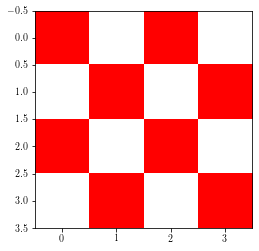

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Example 2D matrix
matrix = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1]
])

# Create a custom colormap
colors = [(1, 1, 1, 0), (1, 0, 0, 1)]  # (R, G, B, Alpha) for 0 and 1
cmap = ListedColormap(colors)

# Plot the matrix
plt.imshow(matrix, cmap=cmap)
# plt.colorbar()
plt.show()

In [10]:
f_vals = [4.405475247002738e-05,9.65627160379331e-05,0.00038679922142288454,0.0007280591494350424,0.0007621454139539068]

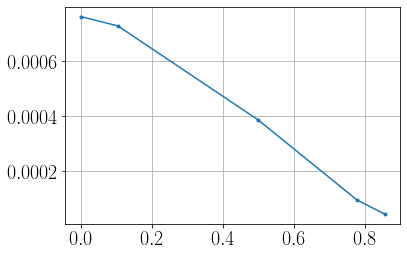

In [28]:
plt.plot(2*(1/alpha_values - 1),f_vals,'.-')
# plt.plot(alpha_values,1e-5*np.exp(5*(alpha_values -)**0.25))
plt.grid()
# plt.yscale('log')
# plt.xscale('log')